<a href="https://colab.research.google.com/github/scthakurii/Lotto-Scraper/blob/main/first_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **My First ML Project**

# **Load data**

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/scthakurii/selenium-v1/refs/heads/main/lotto_results.csv')
df

,DrawNumber,DrawDate,PrimaryNumbers,SecondaryNumbers
0,3603,2016-01-30T00:00:00,"20,5,28,45,29,25","30,21"
1,3601,2016-01-23T00:00:00,"41,33,45,20,24,44","29,12"
2,3599,2016-01-16T00:00:00,"1,13,22,11,3,24","29,30"
3,3597,2016-01-09T00:00:00,"20,25,36,30,18,2","5,11"
4,3595,2016-01-02T00:00:00,"40,10,31,3,45,44","38,37"
...,...,...,...,...
452,4517,2024-11-02T00:00:00,"18,6,42,10,1,3","5,40"
453,4533,2024-12-28T00:00:00,"26,41,4,12,29,40","34,31"
454,4531,2024-12-21T00:00:00,"44,27,38,18,9,25","23,7"
455,4529,2024-12-14T00:00:00,"30,35,6,7,21,11","29,13"


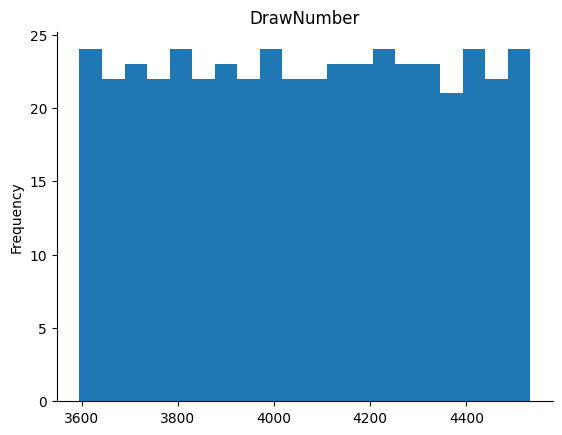

In [3]:
# @title DrawNumber

from matplotlib import pyplot as plt
df['DrawNumber'].plot(kind='hist', bins=20, title='DrawNumber')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Data preparation**

## Data separation as X and y

In [9]:
y = df['PrimaryNumbers']
y

,PrimaryNumbers
0,"20,5,28,45,29,25"
1,"41,33,45,20,24,44"
2,"1,13,22,11,3,24"
3,"20,25,36,30,18,2"
4,"40,10,31,3,45,44"
...,...
452,"18,6,42,10,1,3"
453,"26,41,4,12,29,40"
454,"44,27,38,18,9,25"
455,"30,35,6,7,21,11"


In [10]:
X = df.drop('DrawDate', axis=1)
X

,DrawNumber,PrimaryNumbers,SecondaryNumbers
0,3603,"20,5,28,45,29,25","30,21"
1,3601,"41,33,45,20,24,44","29,12"
2,3599,"1,13,22,11,3,24","29,30"
3,3597,"20,25,36,30,18,2","5,11"
4,3595,"40,10,31,3,45,44","38,37"
...,...,...,...
452,4517,"18,6,42,10,1,3","5,40"
453,4533,"26,41,4,12,29,40","34,31"
454,4531,"44,27,38,18,9,25","23,7"
455,4529,"30,35,6,7,21,11","29,13"


## Data splitting

In [11]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [12]:
X_train

,DrawNumber,PrimaryNumbers,SecondaryNumbers
19,3635,"13,39,11,14,5,37","12,32"
188,3981,"27,39,7,41,38,20","9,43"
254,4123,"6,8,40,10,29,1","31,42"
152,3915,"36,18,8,19,38,42","39,4"
433,4485,"21,2,36,24,18,1","14,27"
...,...,...,...
343,4307,"7,9,42,6,22,3","16,13"
359,4327,"38,17,18,2,11,9","41,37"
323,4261,"41,38,23,5,13,9","4,43"
280,4173,"30,14,38,32,2,35","45,10"


In [13]:
X_test

,DrawNumber,PrimaryNumbers,SecondaryNumbers
418,4447,"19,15,18,30,5,8","7,26"
419,4463,"1,26,7,20,39,34","8,10"
22,3645,"31,7,28,10,4,17","12,23"
441,4505,"6,21,24,29,32,42","25,30"
158,3919,"9,17,13,11,16,21","33,38"
...,...,...,...
1,3601,"41,33,45,20,24,44","29,12"
305,4229,"9,8,34,23,40,22","17,13"
349,4311,"12,6,3,18,35,31","34,9"
21,3631,"31,14,1,24,35,3","8,17"


# **Model Building**

## **Linear Regression**

### **Training the model**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

### **Applying the model to make a prediction**

In [ ]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [ ]:
y_lr_train_pred

In [ ]:
y_lr_test_pred

### **Evaluate model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

In [ ]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
lr_results

## **Random Forest**

### **Training the model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

### **Applying the model to make a prediction**

In [ ]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

### **Evaluate model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

## **Model comparison**

In [ ]:
df_models = pd.concat([lr_results, rf_results], axis=0)

In [ ]:
df_models.reset_index(drop=True)

# **Data visualization of prediction results**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')